In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
dataframe=pd.read_csv(r"C:\Users\omkar\Documents\Zomato data .csv")
print(dataframe.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

In [78]:
def handleRate(value):
    try:
        if pd.isna(value):  # Check if value is NaN
            return np.nan  # Return NaN for missing values
        value = str(value).split('/')[0]  # Take the first part before '/'
        return float(value)  # Convert to float
    except ValueError:
        return np.nan  # Handle non-numeric values gracefully

dataframe['rate'] = dataframe['rate'].apply(handleRate)


In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [35]:
#Type of restaurant
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


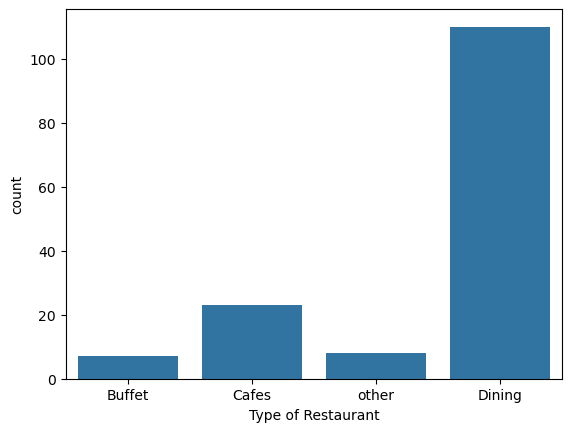

In [37]:

sns.countplot(x=dataframe['listed_in(type)'])  
plt.xlabel("Type of Restaurant")  

plt.show()  


In [39]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


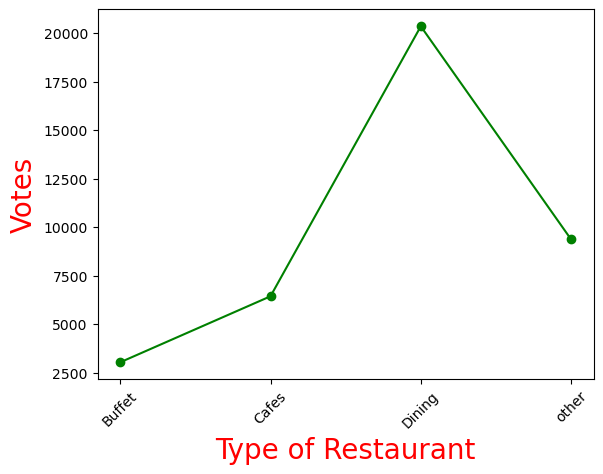

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by 'listed_in(type)' and summing the 'votes'
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()

# Converting the grouped data into a DataFrame
result = pd.DataFrame({'votes': grouped_data})

# Plotting the data
plt.plot(result.index, result['votes'], c="green", marker="o")

# Adding labels with correct parameters
plt.xlabel("Type of Restaurant", color="red", fontsize=20)  # Corrected line
plt.ylabel("Votes", color="red", fontsize=20)

# Display the plot
plt.xticks(rotation=45)
plt.show()




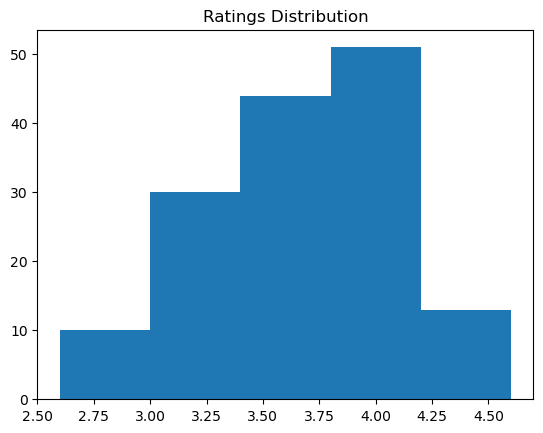

In [75]:

# Plot histogram
plt.hist(df['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()


In [96]:
dataframe.head(6)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),cost_range
0,Jalsa,Yes,Yes,4.1,775,800.0,Buffet,800-900
1,Spice Elephant,Yes,No,4.1,787,800.0,Buffet,800-900
2,San Churro Cafe,Yes,No,3.8,918,800.0,Buffet,800-900
3,Addhuri Udupi Bhojana,No,No,3.7,88,300.0,Buffet,300-400
4,Grand Village,No,No,3.8,166,600.0,Buffet,600-700
5,Timepass Dinner,Yes,No,3.8,286,600.0,Buffet,600-700


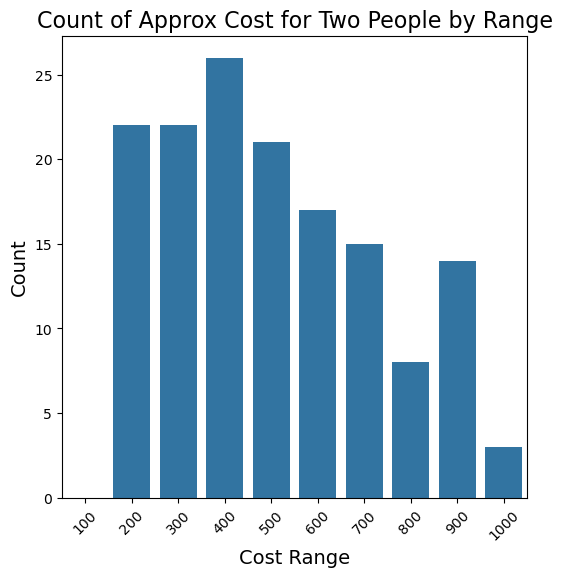

In [102]:
# Assuming 'couple_data' is cleaned already
couple_data = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)

# Binning the cost into categories
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Adjust as needed
labels = ['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']

# Add 'cost_range' column to dataframe
dataframe['cost_range'] = pd.cut(couple_data, bins=bins, labels=labels, right=False)

# Create the count plot
plt.figure(figsize=(6,6))  # Optional: Adjust figure size
sns.countplot(x='cost_range', data=dataframe)

# Add titles and labels
plt.title('Count of Approx Cost for Two People by Range', fontsize=16)
plt.xlabel('Cost Range', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


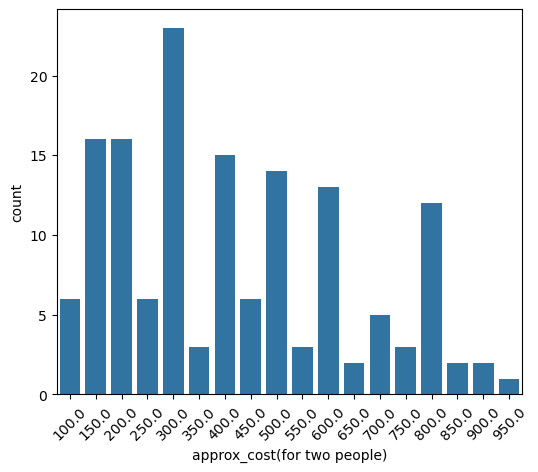

In [98]:
# Check if column exists and is correctly named
if 'approx_cost(for two people)' in dataframe.columns:
    # Convert to numeric after removing commas
    couple_data = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)

    # Plot countplot
    plt.figure(figsize=(6,5))  # Set figure size for better visibility
    sns.countplot(x=couple_data)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()
else:
    print("Column 'approx_cost(for two people)' not found. Check column names.")


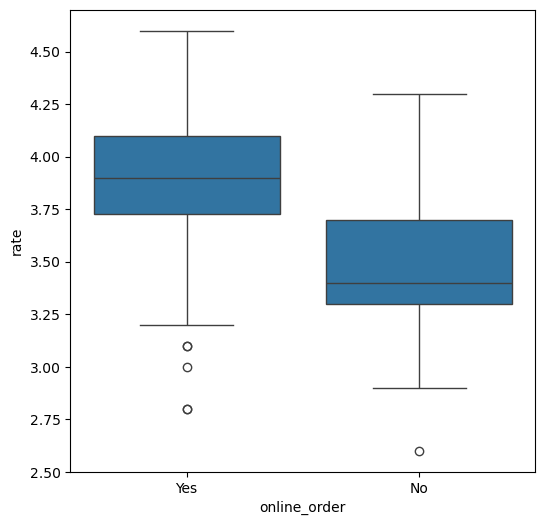

In [110]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y = 'rate', data = dataframe)
plt.show()

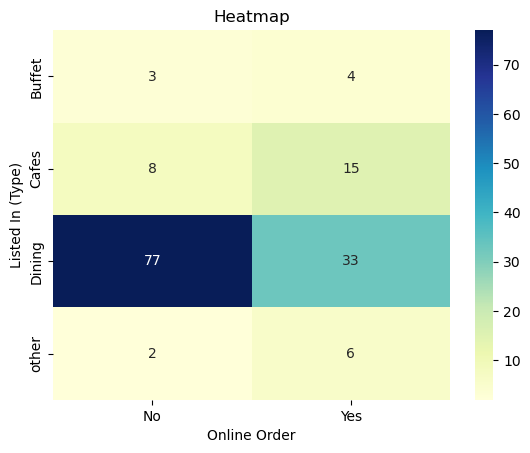

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Modify 'your_file.csv' with actual filename)
dataframe = pd.read_csv(r"C:\Users\omkar\Documents\Zomato data .csv")  

# Creating pivot table
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

# Labels and title
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

# Show plot
plt.show()
